# MRI - Visualization & Segmentation of brain images

In this practical session ...

Dowload the data from the virtual campus and store it in your computer. Then, upload the data into the Colab session using the left menu.

Remember to create a **copy** of this file in your drive and rename it to be able to edit.

NOTES:

-   If you need to review some Python basics, you can use [this tutorial](https://colab.research.google.com/drive/1lrI9l-zQf28swxkJ9dI1iBTNMlVVXqCj?usp=sharing).
-   If you want to learn more about [nilearn](https://https://nilearn.github.io/stable/index.html#) and [nibabel](https://nipy.org/nibabel/), check the online documentation.


In [1]:
# Check and install the toolboxes
try:
    import nibabel
except ImportError:
    # if not, install it using pip
    !pip install nibabel

# And nilearn
try:
    import nilearn
except ImportError:
    # if not, install it using pip
    !pip install nilearn

# And nilearn
try:
    import nipype
except ImportError:
    # if not, install it using pip
    !pip install nipype

  DEPRECATION: traits is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached nipype-1.8.6-py3-none-any.whl (3.2 MB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Using cached prov-2.0.0-py3-none-any.whl (421 kB)
  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)
  Using cached rdflib-6.3.2-py3-none-any.whl (528 kB)
  Using cached simplejson-3.19.1-cp311-cp311-win_amd64.whl (75 kB)
  Using cached traits-6.3.2.tar.gz (9.5 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached filelock-3.12.0-py3-none-any.whl (10 kB)
  Using cached etelemetry-0.3.0-py3-none-any.whl (6.3 kB)
  Using cached looseversion-1.1.2-py3-none-any.whl (8.1 kB)
  Using cached ci_info-0.3.0-py3-none-any.whl (7.8 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached isodate-0.6.1-py2.py3-none-any.whl (41 kB)
  Running setup.py install for traits: started
  Running setup.py install for traits: finished with status 'done'


## 1. Interacting with images

We will see some tools for visualization of MR images (here, brain scans)


In [5]:
import nibabel as nib
import nilearn
from nilearn import plotting


In [6]:
T1_filename = "example_T1w.nii.gz"
T1_img = nib.load(T1_filename)

# need to grab data arrays
T1_data = T1_img.get_fdata()

# plot
plotting.plot_anat(T1_filename, title="T1", vmax=500)


FileNotFoundError: No such file or no access: 'example_T1w.nii.gz'

**Exercise:** Write a code to visualize the T2 scan. Descibe the differences that you observe between the two types of images.


In [ ]:
# WRITE YOUR CODE HERE


##2. Artifact correction and clean-up

-   Correcting artifacts and cleaning the image is crucial for the success of **automated processing methods** (i.e., segmentation, registration, ...)
-   A typical issue with MRI scans is caused by **spatial inhomogeneties** of the magnetic field, namely **bias field**, a smooth signal intensity variation within tissue of the same physical properties.
-   Note that **\*bias field** is modeled as a multiplicative factor, whereas **_noise_** is assumed to be an additive and spatially independent (Gaussian) factor.


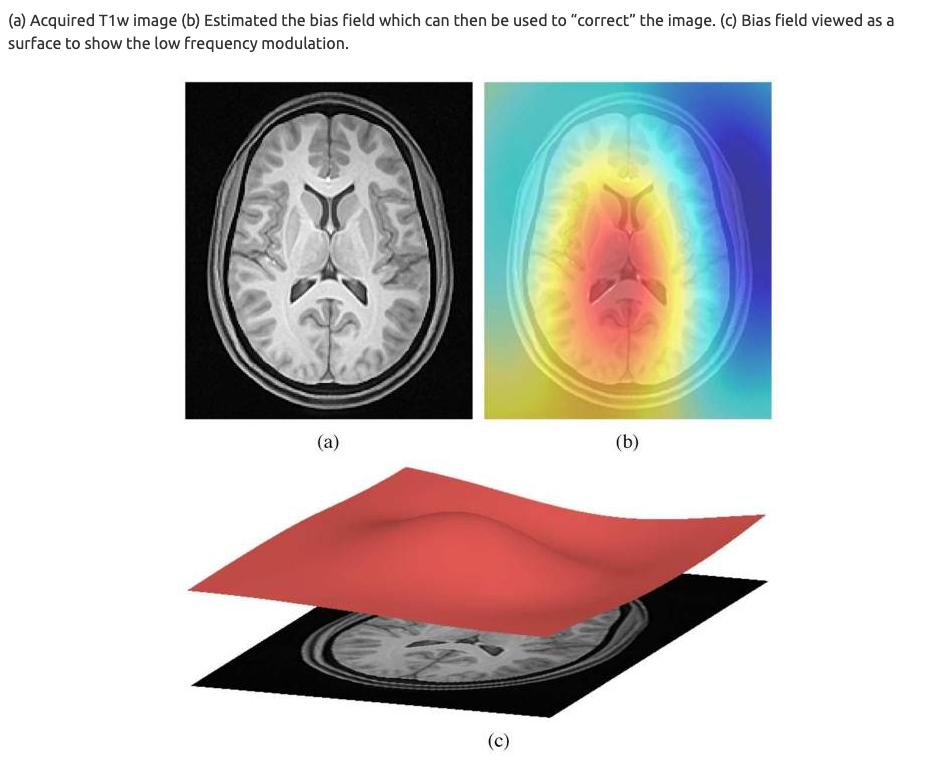


###Bias field correction
There are many automated pipelines that can be used to perform this corrections (some are integrated within longer pipelines such as FreeSurfer, FSL and SPM).

In this example, we will use the ANTs software. It can be run independently (see [documentation](https://http://stnava.github.io/ANTs/)) or within the nipype package.


In [ ]:
from nipype.interfaces.ants import N4BiasFieldCorrection

n4 = N4BiasFieldCorrection()
n4.inputs.dimension = 3
n4.inputs.input_image = "example_T1w.nii.gz"
n4.inputs.bspline_fitting_distance = 300
n4.inputs.shrink_factor = 3
n4.inputs.n_iterations = [50, 50, 30, 20]
n4.cmdline


The above code would give an instruction that should be run from command line.

**DO NOT RUN THIS NOW!!** Note that you have all the images that you need in your images folder.


The **_bias field correction_** produces changes in the histogram and can have a strong impact on a subsequant segmentation task.


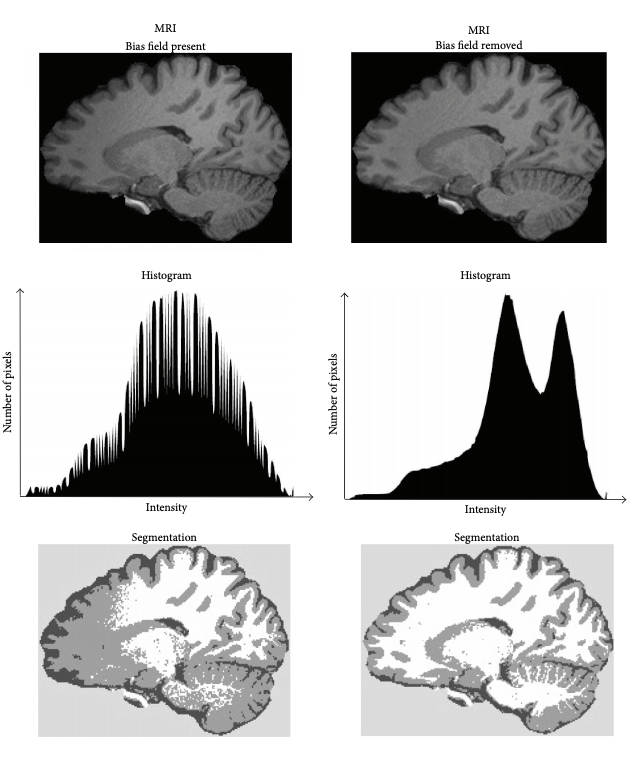


###Visualizing images before and after correction
We'll use nibabel/nilearn tools to visualize some of the example images.


In [ ]:
import nibabel as nib
from nilearn import plotting

T1_orig = "example_T1_brain.nii.gz"
T1_corrected = "example_T1_brain_restore.nii.gz"
T1_img_orig = nib.load(T1_orig)
T1_img_corrected = nib.load(T1_corrected)

# plot
cut_coords = (0, 0, 10)  # try changing these coordinates
plotting.plot_anat(T1_orig, title="T1_orig", cut_coords=cut_coords, vmax=500)
plotting.plot_anat(T1_corrected, title="T1_corrected_img", cut_coords=cut_coords, vmax=500)

**Exercise:** Plot the bias field image (also available in your folder)


In [ ]:
# place your code here


##3. Brain extraction

A common preprocessing step in brain MRI is to extract the brain (separate the brain from skull, skin, neck,...).

Note that, brain extraction has also been run somewhere else, and you can check the outputs in the folders.


In [ ]:
from nipype.interfaces.ants.segmentation import BrainExtraction

T1_img = "example_T1w.nii.gz"
T1_img = nib.load(T1_img)

# plot
cut_coords = (10, 10, 10)
plotting.plot_anat(T1_img, title="T1_img", cut_coords=cut_coords, vmax=255)

**Exercise:** Plot the image after brain extraction.

-   Based on the previous images, which are the methodological basis of the brain extraction tools?
-   Which is the utility of the 'cut_coords' and 'vmax' parameters?


In [ ]:
# PLACE YOUR CODE HERE


##4. Brain Segmentation


Brain segmentation is a common preprocessing step that separates the main brain tissues (White Matter, Gray Matter and CSF) using the histogram. This is typically done with T1-weighted images.


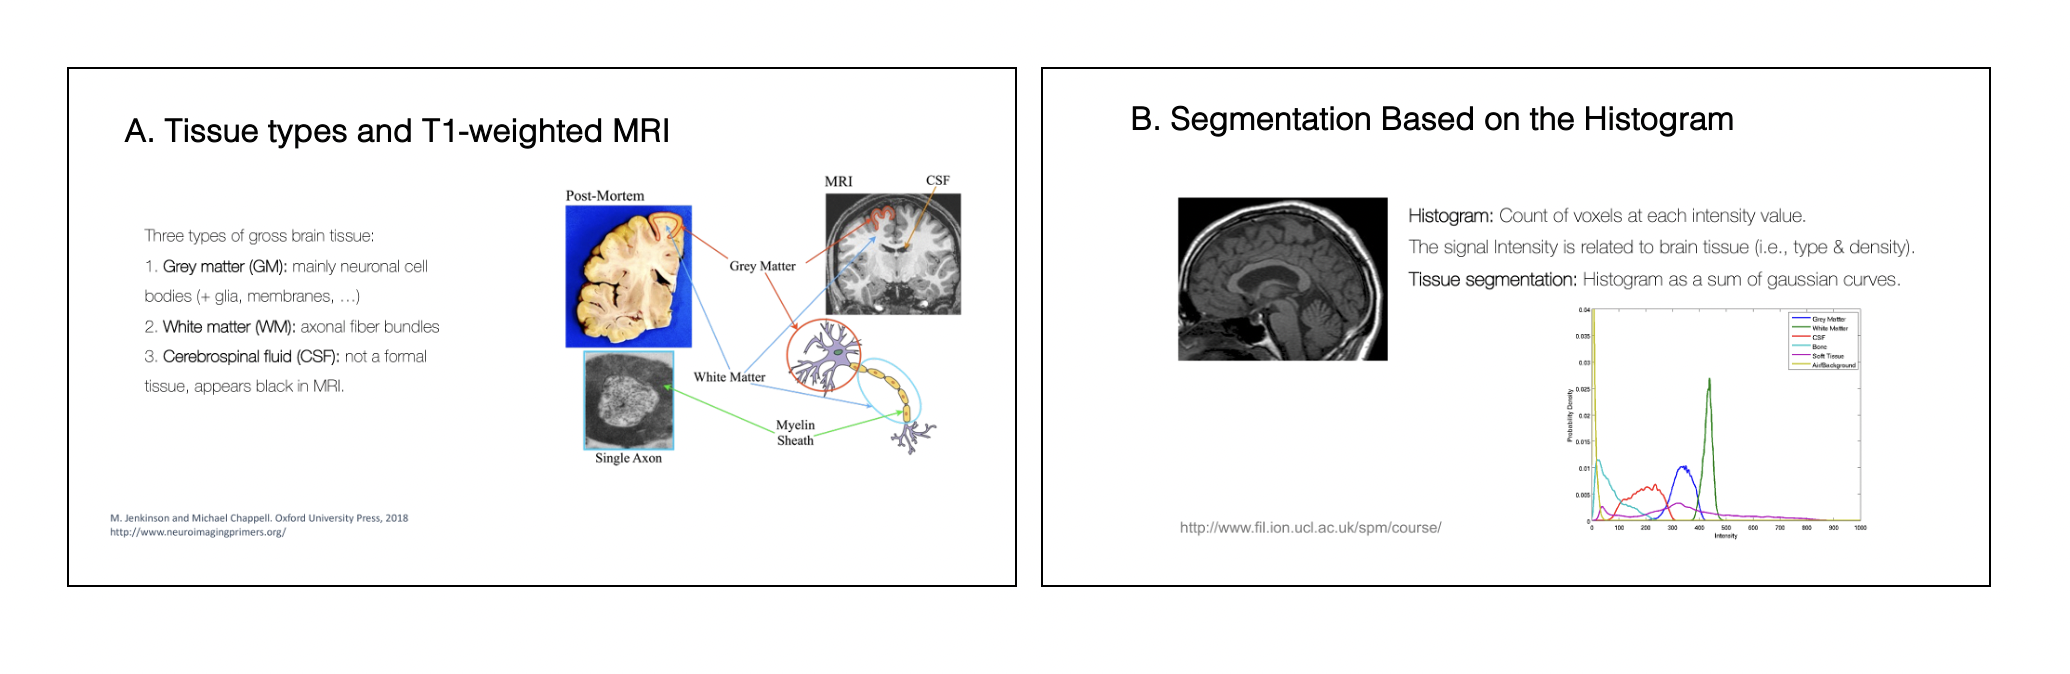


Here, we will explore the main outputs of brain segmentation.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# use imshow to plot the figures
# Plot first figure
T1_img = "example_T1w.nii.gz"
T1_img = nib.load(T1_img)
T1_data = T1_img.get_fdata()
plt.imshow(T1_data[:, :, 160], vmax=500, origin="lower")
plt.title("T1 data before skull-stripping")


Now, we can compute the histogram of this image:


In [ ]:
import numpy as np

# Compute the optimal bin size according to the data
bins = np.histogram_bin_edges(T1_data[T1_data != 0], bins="auto")
# Plot the histogram
sns.histplot(T1_data[T1_data != 0], bins=bins)
plt.xlim([0, 255])

**Question:** What do you observe from the previous histogram?


**Exercise:** plot the image and the histogram after skull stripping. Try also examining other slices and sections.


In [ ]:
# place your code here (plot image after skull stripping and store data into 'T1_brain_data')


In [ ]:
# place your code here (histogram)


Now, we will examine the outputs of the segmentation together with the abobe histogram:


In [ ]:
# NOTE: consider that brain data is stored into 'T1_brain_data'

import itertools

T1_seg_image = nib.load("example_T1_brain_seg.nii.gz")
T1_seg_data = T1_seg_image.get_fdata()
labels = np.unique(T1_seg_data[T1_seg_data != 0]).astype("int")
palette = itertools.cycle(sns.color_palette("Set3"))
for label in labels:
    sns.histplot(T1_brain_data[T1_seg_data == label], bins=bins, color=next(palette), alpha=0.6)

**Exercise**: Use the histogram above to explore the differences of performing segmentation on images before/after bias correction.


In [ ]:
# place your code here


Final remarks: A question of probability:


In [ ]:
GMprob_image = "example_T1_brain_pve_1.nii.gz"
GMprob_image = nib.load(GMprob_image)
GM_probmap = GMprob_image.get_fdata()

plotting.plot_roi(roi_img=GMprob_image, bg_img=T1_img, alpha=0.2, cmap="jet", vmin=0.5, vmax=1)


**Exercise**: Try different options of the plotting.plot_roi function to improve the image above.


In [ ]:
# place your code here
